# Емельянова Елизавета Всеволодовна БВТ2201

# Лабораторная работа №4: Закрепление практических навыков анализа, выбора и применения современных моделей синтеза речи на основе нейросетевых архитектур

## 1. Актуальные подходы к синтезу речи:

### Нейронный TTS

Это преобразование текста в речь, основанное на искусственном интеллекте и глубоком обучении. В результате нейронный синтез речи значительно более естественный и выразительный, чем стандартный синтез текста в речь. Нейронный TTS все еще является формой машинной речи — только он построен на нейронных сетях, моделированных по образцу человеческого мозга. Нейронные сети, используемые для нейронного TTS, обрабатывают большие наборы данных, чтобы изучить оптимальные пути от ввода к выводу. Это форма машинного обучения, поскольку эти сети используют нейронный вокодер для синтеза речевых волн без ввода пользователя. Чтобы система нейронного TTS могла точно имитировать человеческий голос, ей требуется доступ к нескольким моделям глубоких нейронных сетей. Эти модели включают акустические, тональные и временные модели.


### Автоэнкодеры

Автоэнкодеры в TTS применяются для построения компактных представлений речи, которые позволяют лучше управлять параметрами голоса и интонации, а также улучшать качество синтеза при низких объемах данных. Они используются для создания переменных кодировок, которые затем декодируются в аудиосигналы.

### Трансформеры

Трансформеры — это архитектуры, позволяющие эффективно моделировать длинные зависимости в данных текста и звука без ограничений рекуррентных сетей. Трансформерные модели, такие как Transformer-TTS, обеспечивают высокоточечный контроль над синтезируемой речью и высокой скоростью генерации. Благодаря механизму внимания трансформеры хорошо справляются с вариативностью интонаций и акцентов.

### Диффузионки

Диффузионные модели — одна из новых технологий синтеза речи, которые работают через постепенное улучшение шума до конечного аудиосигнала. Этот подход способствует созданию высококачественных и естественно звучащих голосов, конкурируя с традиционными методами. Диффузионные модели хорошо подходят для сложных задач, где важна высокая точность и разнообразие звучания, однако пока находятся в активной стадии исследований и внедрения.

## Модели

In [1]:
import torch
from pathlib import Path
import time
import psutil

In [2]:
input = [
    "Сегодня очень хорошая погода, светит солнце и почти нет ветра.",
    "Подскажите, как пройти до центральной библиотеки? Я тут впервые.",
    "В магазине я купил свежий хлеб, молоко, сыр и немного фруктов.",
    "Сейчас без пятнадцати четыре, а автобус приходит в семнадцать ноль ноль.",
    "Здравствуйте, меня зовут Анна, я живу в этом доме на третьем этаже.",
    "Пожалуйста, закройте окно, потому что в комнате стало довольно прохладно.",
    "Моя комната большая и светлая, в ней два окна и удобный рабочий стол.",
    "Моя мама сейчас готовит вкусный обед, а папа читает газету в гостиной.",
    "Я не могу найти свою книгу, возможно, она лежит на столе в соседней комнате.",
    "Завтра утром мы поедем к бабушке в гости и будем там весь день."
]

### Bark

In [3]:
%pip install git+https://github.com/suno-ai/bark.git

  Cloning https://github.com/suno-ai/bark.git to /tmp/pip-req-build-cw3w6ciq
  Running command git clone --filter=blob:none --quiet https://github.com/suno-ai/bark.git /tmp/pip-req-build-cw3w6ciq
  Resolved https://github.com/suno-ai/bark.git to commit f4f32d4cd480dfec1c245d258174bc9bde3c2148
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 53.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.2 MB/s eta 0:00:00
  Created wheel for suno-bark: filename=suno_bark-0.0.1a0-py3-none-any.whl size=2567394 sha256=038ee8343c37e60950010a7869db095d34287d6823c96b25f3fe0570b17b38b3
  Stored in directory: /tmp/pip-ephem-wheel-cache-3xq

In [4]:
from bark import SAMPLE_RATE, generate_audio, preload_models
from scipy.io.wavfile import write as write_wav

original_load = torch.load

def custom_load(*args, **kwargs):
    kwargs['weights_only'] = False
    return original_load(*args, **kwargs)

torch.load = custom_load

preload_models()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


text_2.pt:   0%|          | 0.00/5.35G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

coarse_2.pt:   0%|          | 0.00/3.93G [00:00<?, ?B/s]

fine_2.pt:   0%|          | 0.00/3.74G [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/torch/nn/utils/weight_norm.py:144: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Downloading: "https://dl.fbaipublicfiles.com/encodec/v0/encodec_24khz-d7cc33bc.th" to /root/.cache/torch/hub/checkpoints/encodec_24khz-d7cc33bc.th


100%|██████████| 88.9M/88.9M [00:00<00:00, 184MB/s]


In [8]:
output_dir = Path("bark_results")
output_dir.mkdir(exist_ok=True)

start_time = time.time()

for i, text in enumerate(input):
    audio_array = generate_audio(text, history_prompt="v2/ru_speaker_0")

    filename = output_dir / f"bark_audio_{i+1:02d}.wav"
    write_wav(filename, SAMPLE_RATE, audio_array)

total_time_bark = time.time() - start_time

process = psutil.Process()
memory_usage_bark = process.memory_info().rss / 1024 / 1024


100%|██████████| 246/246 [00:04<00:00, 56.61it/s]

100%|██████████| 13/13 [00:15<00:00,  1.23s/it]

100%|██████████| 275/275 [00:04<00:00, 58.92it/s]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

100%|██████████| 324/324 [00:05<00:00, 59.11it/s]

100%|██████████| 17/17 [00:20<00:00,  1.22s/it]

100%|██████████| 299/299 [00:05<00:00, 57.81it/s]

100%|██████████| 15/15 [00:19<00:00,  1.27s/it]

100%|██████████| 244/244 [00:04<00:00, 49.96it/s]

100%|██████████| 13/13 [00:15<00:00,  1.21s/it]

100%|██████████| 290/290 [00:05<00:00, 53.92it/s]

100%|██████████| 15/15 [00:18<00:00,  1.23s/it]

100%|██████████| 259/259 [00:05<00:00, 46.80it/s]

100%|██████████| 13/13 [00:16<00:00,  1.25s/it]

100%|██████████| 270/270 [00:05<00:00, 50.04it/s]

100%|██████████| 14/14 [00:17<00:00,  1.22s/it]

100%|██████████| 248/248 [00:04<00:00, 50.90it/s]

100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

100%|██████████| 229/229 [00:04<00:00, 53.11it/s]

100%|██████████| 12/12 [00:14<00:00,  1.25s/it]


In [11]:
print(total_time_bark)
print(memory_usage_bark)

242.03307628631592
7568.70703125


### XTTS

In [3]:
!pip install coqui-tts

In [4]:
from TTS.api import TTS

/usr/local/lib/python3.12/dist-packages/jieba/__init__.py:44: SyntaxWarning: invalid escape sequence '\.'
  re_han_default = re.compile("([\u4E00-\u9FD5a-zA-Z0-9+#&\._%\-]+)", re.U)
/usr/local/lib/python3.12/dist-packages/jieba/__init__.py:46: SyntaxWarning: invalid escape sequence '\s'
  re_skip_default = re.compile("(\r\n|\s)", re.U)
/usr/local/lib/python3.12/dist-packages/jieba/finalseg/__init__.py:78: SyntaxWarning: invalid escape sequence '\.'
  re_skip = re.compile("([a-zA-Z0-9]+(?:\.\d+)?%?)")


In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"

tts = TTS("tts_models/multilingual/multi-dataset/xtts_v2").to(device)

output_dir = Path("xtts_results")
output_dir.mkdir(exist_ok=True)

start_time = time.time()

for i, text in enumerate(input):
    filename = output_dir / f"xtts_audio_{i+1:02d}.wav"

    tts.tts_to_file(
        text=text,
        speaker_wav="temp_audio.wav",
        language='ru',
        file_path=filename
    )

total_time_xtts = time.time() - start_time

process = psutil.Process()
memory_usage_xtts = process.memory_info().rss / 1024 / 1024

 > You must confirm the following:
 | > "I have purchased a commercial license from Coqui: licensing@coqui.ai"
 | > "Otherwise, I agree to the terms of the non-commercial CPML: https://coqui.ai/cpml" - [y/n]
 | | > y


100%|██████████| 1.87G/1.87G [00:23<00:00, 78.7MiB/s]
4.37kiB [00:00, 5.51MiB/s]
361kiB [00:00, 45.3MiB/s]
100%|██████████| 32.0/32.0 [00:00<00:00, 83.5kiB/s]
100%|██████████| 7.75M/7.75M [00:00<00:00, 78.3MiB/s]
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance

### Silero TTS

In [6]:
%pip install silero

In [7]:
from silero import silero_tts
import soundfile as sf
model, example_text = silero_tts(language='ru',
                                 speaker='v5_ru')

output_dir = Path("silero_results")
output_dir.mkdir(exist_ok=True)

start_time = time.time()

for i, text in enumerate(input):
    filename = output_dir / f"silero_audio_{i+1:02d}.wav"

    audio = model.apply_tts(text=text)
    sf.write(filename, audio, 48000)

total_time_silero = time.time() - start_time

process = psutil.Process()
memory_usage_silero = process.memory_info().rss / 1024 / 1024

100%|██████████| 139M/139M [00:08<00:00, 17.0MB/s]
/usr/local/lib/python3.12/dist-packages/torch/package/package_importer.py:257: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  dtype = storage_type.dtype


### Piper TTS

In [8]:
!pip install piper-tts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 130.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.9 MB/s eta 0:00:00


In [9]:
from piper import PiperVoice
import wave

voice = PiperVoice.load("ru_RU-ruslan-medium.onnx")

output_dir = Path("piper_results")
output_dir.mkdir(exist_ok=True)

start_time = time.time()

for i, text in enumerate(input):
    filename = output_dir / f"piper_audio_{i+1:02d}.wav"

    with wave.open(str(filename), "wb") as wav_file:
        voice.synthesize_wav(text, wav_file)

total_time_piper = time.time() - start_time

process = psutil.Process()
memory_usage_piper = process.memory_info().rss / 1024 / 1024

### Vosk TTS

In [10]:
!pip install vosk-tts

In [12]:
from vosk_tts import Model, Synth
model = Model(model_name="vosk-model-tts-ru-0.9-multi")
synth = Synth(model)

output_dir = Path("vosk_results")
output_dir.mkdir(exist_ok=True)

start_time = time.time()

for i, text in enumerate(input):
    filename = output_dir / f"vosk_audio_{i+1:02d}.wav"

    synth.synth(text, str(filename), speaker_id=2)

total_time_vosk = time.time() - start_time

process = psutil.Process()
memory_usage_vosk = process.memory_info().rss / 1024 / 1024

## Сравнение моделей

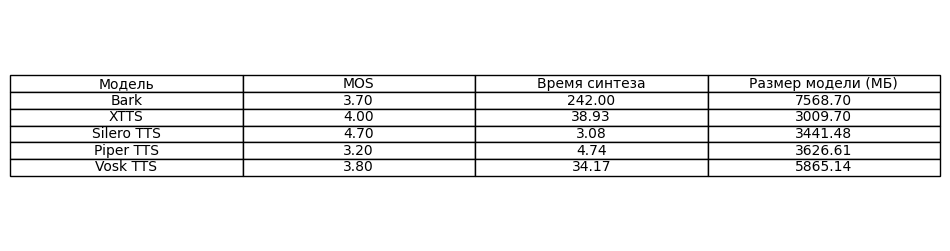

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

models = ['Bark', 'XTTS', 'Silero TTS', 'Piper TTS', 'Vosk TTS']

parameters = {
    'MOS': [3.7, 4.0, 4.7, 3.2, 3.8],
    'Время синтеза': [242.0, total_time_xtts, total_time_silero, total_time_piper, total_time_vosk],
    'Размер модели (МБ)': [7568.7, memory_usage_xtts, memory_usage_silero, memory_usage_piper, memory_usage_vosk],
}

fig, ax = plt.subplots(figsize=(12, 3))

ax.axis('tight')
ax.axis('off')

table_data = [['Модель'] + list(parameters.keys())]

for i, model in enumerate(models):
    row = [model]
    for param in parameters.keys():
        value = parameters[param][i]
        row.append(f"{value:.2f}")
    table_data.append(row)

table = ax.table(cellText=table_data,
                cellLoc='center',
                loc='center')

plt.show()

## Вывод: Лучше всех себя показала модель Silero TTS. Сгенерированная ею речь больше всего похожа на человеческую, присутствует интонация и соблюдение знаков препинания. Модель синтезирует аудио быстрее остальных моделей и занимает второе место с конца по размеру.